# Final project
## Hanna Anderson, Research Computing 12/7/2021
How does protein expression differ in oceanic microbes across ocean gyres?

First, install packages:

In [1]:
import cartopy.crs as ccrs
import cartopy
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes
import numpy as np
import xarray as xr
import pooch
import pandas as pd
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

## Read in data from Zenodo

In [2]:
#samples
doi = "doi:10.5281/zenodo.5745949"
fname = "26_samples_reload_labels.csv"
file_path = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:f1cbcf5e7097bfda21ec8d8b4dd39672"
)

In [3]:
#samples metadata
doi = "doi:10.5281/zenodo.5745949"
fname = "26_samples_reload_labels_metadata.csv"
file_path2 = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:7c50c1b7df371503c6fb003acd53eb98"
)

In [4]:
#Fe Outpace
doi = "doi:10.5281/zenodo.5745949"
fname = "Fe_Dissolved_TMR_OUTPACE.csv"
file_path5 = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:3564e63f4bc3e490936767ddd36a9905"
)

In [5]:
#N Outpace
doi = "doi:10.5281/zenodo.5745949"
fname = "Inorganic_Nitrogen_nanomolar_OUTPACE.csv"
file_path6 = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:a4e3d8fb20c14ba053e2821d83232e2b"
)

In [6]:
#P Outpace
doi = "doi:10.5281/zenodo.5745949"
fname = "Inorganic_Phosphorus_nanomolar_OUTPACE.csv"
file_path7 = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:903b808134cbf635697a3ecbc2b07a87"
)

In [7]:
#CTD OC471
doi = "doi:10.5281/zenodo.5745949"
fname = "OC471_CTD.csv"
file_path8 = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:a0a7fb79f00cc22bef738a82f6de1842"
)

In [8]:
#Pabst CTD
doi = "doi:10.5281/zenodo.5745949"
fname = "PABST-AE1409-CTD-P.csv"
file_path9 = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:869f46fcb83d3774e3a3dcc9148c53f8"
)

In [9]:
#samples+annotations file
doi = "doi:10.5281/zenodo.5759077"
fname = "annots.csv"
file_path11 = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:43c2b7f5a8d07d4f043143d11bc9e7cc"
)

In [10]:
samples = pd.read_csv(file_path)
metadata = pd.read_csv(file_path2, header=1)
Outpace_Fe = pd.read_csv(file_path5)
Outpace_N = pd.read_csv(file_path6)
Outpace_P = pd.read_csv(file_path7)
OC471_CTD = pd.read_csv(file_path8)
Pabst_CTD = pd.read_csv(file_path9)
annots = pd.read_csv(file_path11)

# Cruise paths and environmental parameters
## OC471's cruise path, temp, and salinity measured in the NASG

In [11]:
#Transform longitude data to negative instead of W
OC471_CTD.Lon = OC471_CTD.Lon*-1

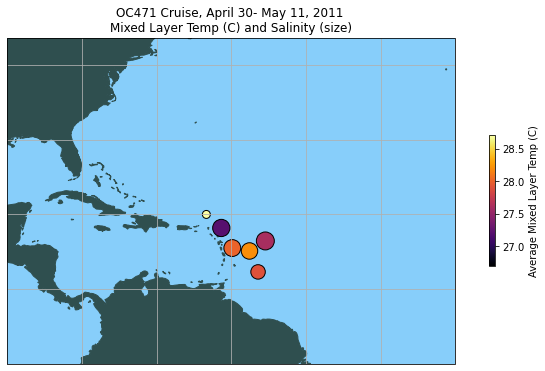

In [12]:
extent = [-90, -30, 0, 40]
#n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
sal = OC471_CTD.Salinity_Avg**3/225

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightskyblue');
ax.add_feature(cartopy.feature.LAND, facecolor='darkslategrey');
ax.set_global()
ax.gridlines()
ax.set_extent(extent)
ax.set_title('OC471 Cruise, April 30- May 11, 2011 \nMixed Layer Temp (C) and Salinity (size)')
plot = OC471_CTD.plot(ax=ax, transform=ccrs.PlateCarree(), kind='scatter', c='Temp_Avg', x='Lon', y='Lat', s=sal, cmap='inferno', edgecolor='k', colorbar=False)
plot = ax.collections[0]
fig.colorbar(plot, shrink=0.4, label='Average Mixed Layer Temp (C)');


## Temperature and Salinity on Pabst (AE1409) Cruise

In [13]:
#data clean Pabst_CTD and subset the minimum depth measurements at each station
Pabst_CTD.rename(columns={Pabst_CTD.columns[3]:'Depth_m'}, inplace=True)
Pabst_CTD.rename(columns={Pabst_CTD.columns[4]:'Salinity'}, inplace=True)
Pabst_CTD.rename(columns={Pabst_CTD.columns[7]:'Temp'}, inplace=True)
Pabst_CTD.rename(columns={Pabst_CTD.columns[9]:'Lat'}, inplace=True)
Pabst_CTD.rename(columns={Pabst_CTD.columns[10]:'Lon'}, inplace=True)
Pabst_CTD.rename(columns={Pabst_CTD.columns[15]:'T_APA'}, inplace=True)
Pabst_CTD.rename(columns={Pabst_CTD.columns[19]:'DOP'}, inplace=True)

Pabst_CTD = Pabst_CTD.dropna(how='all')
Surface_Pabst = Pabst_CTD.loc[Pabst_CTD.groupby('Station').Depth_m.idxmin()]

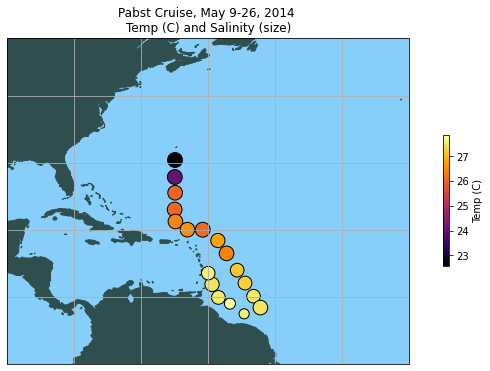

In [14]:
extent = [-90, -30, 0, 45]
mag = Surface_Pabst.Salinity**3 / 225
#n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightskyblue');
ax.add_feature(cartopy.feature.LAND, facecolor='darkslategrey');
ax.set_global()
ax.gridlines()
ax.set_extent(extent)
ax.set_title('Pabst Cruise, May 9-26, 2014 \nTemp (C) and Salinity (size)')
plot = Surface_Pabst.plot(ax=ax, transform=ccrs.PlateCarree(), kind='scatter', c='Temp', x='Lon', y='Lat', s=mag, cmap='inferno', edgecolor='k', colorbar=False)
plot = ax.collections[0]
fig.colorbar(plot, shrink=0.4, label='Temp (C)');


## APA and DOP trends in Pabst

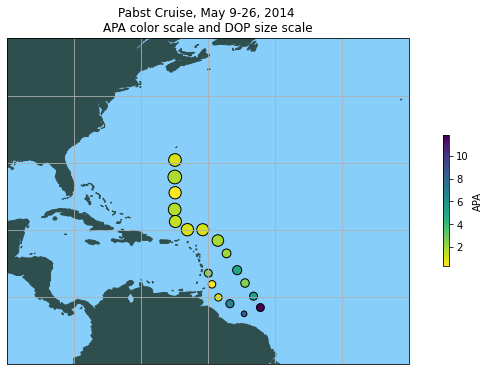

In [15]:
extent = [-90, -30, 0, 45]
mag = (abs(np.log(Surface_Pabst.DOP))**2)*25
#n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightskyblue');
ax.add_feature(cartopy.feature.LAND, facecolor='darkslategrey');
ax.set_global()
ax.gridlines()
ax.set_extent(extent)
ax.set_title('Pabst Cruise, May 9-26, 2014 \nAPA color scale and DOP size scale')
plot = Surface_Pabst.plot(ax=ax, transform=ccrs.PlateCarree(), kind='scatter', c='APA', x='Lon', y='Lat', s=mag, cmap='viridis_r', edgecolor='k', colorbar=False)
plot = ax.collections[0]
fig.colorbar(plot, shrink=0.4, label='APA');

#for i, txt in enumerate(n):
#    ax[0].annotate(txt, (Surface_Pabst.Lon[i], Surface_Pabst.Lat[i]))

## What is APA?
APAs are part of the microbial DOP uptake pathway. This happens a lot in the open ocean where inorganic phosphorus is less available and there is more DOP. This chart shows us that in this cruise though, APA did not correspond to areas with higher DOP.

That's unusual!

## Let's check the cruise data from another basin, like Outpace in SPSG

In [16]:
#data clean Outpace files and subset the minimum depth measurements at each station for Outpace_P
Outpace_P.rename(columns={Outpace_P.columns[1]:'Station'}, inplace=True)
Outpace_P.rename(columns={Outpace_P.columns[2]:'Date'}, inplace=True)
Outpace_P.rename(columns={Outpace_P.columns[3]:'Lat'}, inplace=True)
Outpace_P.rename(columns={Outpace_P.columns[4]:'Lon'}, inplace=True)
Outpace_P.rename(columns={Outpace_P.columns[5]:'Pressure'}, inplace=True)
Outpace_P.rename(columns={Outpace_P.columns[7]:'Salinity'}, inplace=True)
Outpace_P.rename(columns={Outpace_P.columns[8]:'Temp'}, inplace=True)
Outpace_P.rename(columns={Outpace_P.columns[14]:'DIP'}, inplace=True)

Outpace_N.rename(columns={Outpace_N.columns[1]:'Station'}, inplace=True)
Outpace_N.rename(columns={Outpace_N.columns[2]:'Date'}, inplace=True)
Outpace_N.rename(columns={Outpace_N.columns[3]:'Lat'}, inplace=True)
Outpace_N.rename(columns={Outpace_N.columns[4]:'Lon'}, inplace=True)
Outpace_N.rename(columns={Outpace_N.columns[5]:'Pressure'}, inplace=True)
Outpace_N.rename(columns={Outpace_N.columns[7]:'Salinity'}, inplace=True)
Outpace_N.rename(columns={Outpace_N.columns[8]:'Temp'}, inplace=True)

Outpace_Fe.rename(columns={Outpace_Fe.columns[1]:'Station'}, inplace=True)
Outpace_Fe.rename(columns={Outpace_Fe.columns[2]:'Date'}, inplace=True)
Outpace_Fe.rename(columns={Outpace_Fe.columns[3]:'Lat'}, inplace=True)
Outpace_Fe.rename(columns={Outpace_Fe.columns[4]:'Lon'}, inplace=True)
Outpace_Fe.rename(columns={Outpace_Fe.columns[5]:'Pressure'}, inplace=True)
Outpace_Fe.rename(columns={Outpace_Fe.columns[7]:'Salinity'}, inplace=True)
Outpace_Fe.rename(columns={Outpace_Fe.columns[8]:'Temp'}, inplace=True)
Outpace_Fe.rename(columns={Outpace_Fe.columns[14]:'DFe'}, inplace=True)

Outpace_P = Outpace_P.dropna(how='all')
Surface_Outpace_P = Outpace_P.loc[Outpace_P.groupby('Station').Pressure.idxmin()]

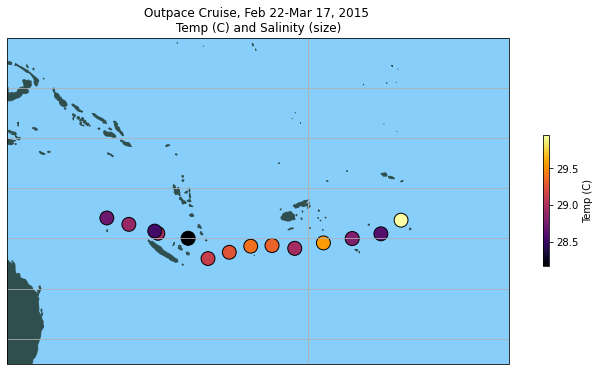

In [17]:
extent = [150, 200, -30, 0]
mag = Surface_Outpace_P.Salinity**3 / 225
#n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightskyblue');
ax.add_feature(cartopy.feature.LAND, facecolor='darkslategrey');
ax.set_global()
ax.gridlines()
ax.set_extent(extent)
ax.set_title('Outpace Cruise, Feb 22-Mar 17, 2015 \nTemp (C) and Salinity (size)')
plot = Surface_Outpace_P.plot(ax=ax, transform=ccrs.PlateCarree(), kind='scatter', c='Temp', x='Lon', y='Lat', s=mag, cmap='inferno', edgecolor='k', colorbar=False)
plot = ax.collections[0]
fig.colorbar(plot, shrink=0.4, label='Temp (C)');


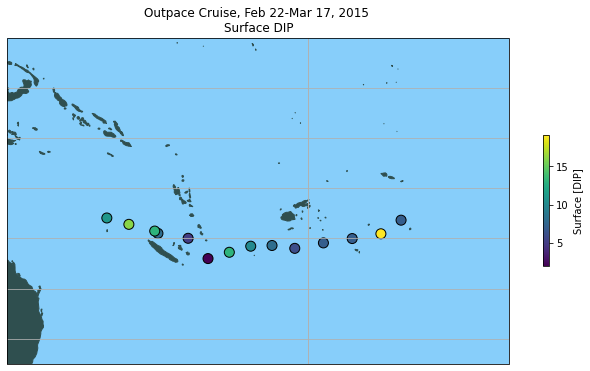

In [18]:
extent = [150, 200, -30, 0]
mag = Surface_Outpace_P.DIP
#n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightskyblue');
ax.add_feature(cartopy.feature.LAND, facecolor='darkslategrey');
ax.set_global()
ax.gridlines()
ax.set_extent(extent)
ax.set_title('Outpace Cruise, Feb 22-Mar 17, 2015 \nSurface DIP')
plot = Surface_Outpace_P.plot(ax=ax, transform=ccrs.PlateCarree(), kind='scatter', c='DIP', x='Lon', y='Lat', s=100, cmap='viridis', edgecolor='k', colorbar=False)
plot = ax.collections[0]
fig.colorbar(plot, shrink=0.4, label='Surface [DIP]');

DIP behaves opposite of DOP, so there should be less of it in the open ocean. We generally see here, although the trend is small.

## Water column profiles! 
We can visualize DIP and NOx down the water column. Both are drawn down at surface, and re-formed at depth (typical for bio-limiting nutrients). DFe is all over the place.

In [19]:
#subset some stations
Station_1_Outpace_P = Outpace_P.loc[Outpace_P.Station == 'out_t_001b']
Station_16_Outpace_P = Outpace_P.loc[Outpace_P.Station == 'out_t_016']
Station_1_Outpace_N = Outpace_N.loc[Outpace_N.Station == 'out_t_001b']
Station_16_Outpace_N = Outpace_N.loc[Outpace_N.Station == 'out_t_016']
Station_1_Outpace_Fe = Outpace_Fe.loc[Outpace_Fe.Station == 'out_t_001b']
Station_16_Outpace_Fe = Outpace_Fe.loc[Outpace_Fe.Station == 'out_t_016']

Station_3_Outpace_P = Outpace_P.loc[Outpace_P.Station == 'out_t_003']
Station_3_Outpace_N = Outpace_N.loc[Outpace_N.Station == 'out_t_003']
Station_3_Outpace_Fe = Outpace_Fe.loc[Outpace_Fe.Station == 'out_t_003']

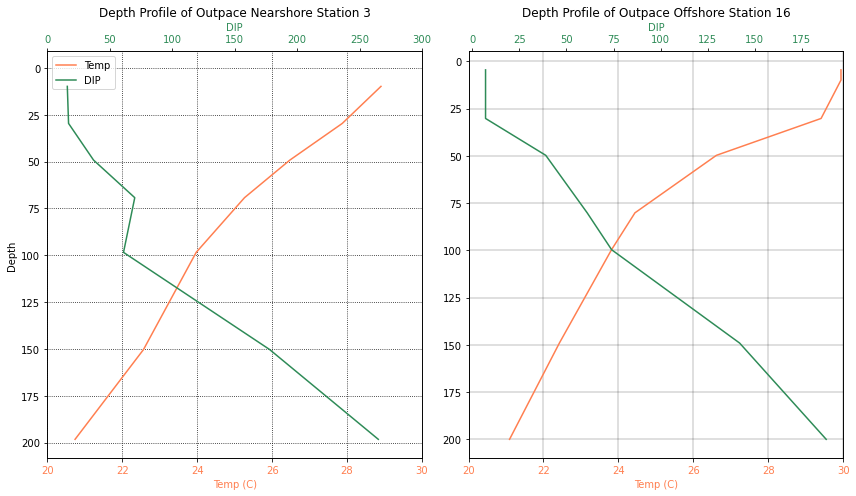

In [20]:
fig,ax = plt.subplots(figsize=(12,7), ncols=2)

cf0 = ax[0].plot(Station_3_Outpace_P.Temp, Station_3_Outpace_P.Pressure, color='coral', label='Temp (C)')
#cf02 = ax[0].plot(Station_1_Outpace_N.NOx, Station_1_Outpace_N.Pressure, color='m')
#cf03 = ax[0].plot(Station_1_Outpace_Fe.DFe, Station_1_Outpace_Fe.Pressure, color='sienna')

cf1 = ax[1].plot(Station_16_Outpace_P.Temp, Station_16_Outpace_P.Pressure, color='coral')
#cf02 = ax[1].plot(Station_16_Outpace_N.NOx, Station_16_Outpace_N.Pressure, color='m')
#cf03 = ax[1].plot(Station_16_Outpace_Fe.DFe, Station_16_Outpace_Fe.Pressure, color='sienna')

line1, = ax[0].plot([1, 2, 3], label='Temp', color='coral')
line2, = ax[0].plot([1, 2, 3], label='DIP', color='seagreen')
ax[0].legend(handles=[line1, line2])

ax[0].set_xlim(20,30)
ax[0].set_xlabel('Temp (C)', color='coral')
ax[0].set_ylabel('Depth')
ax[0].set_title('Depth Profile of Outpace Nearshore Station 3')
ax[0].tick_params(axis='x', labelcolor='coral')
ax[0].grid(which='major',linestyle='dotted',color='k')
ax[0].invert_yaxis()
#ax[0].invert_xaxis()
ax2 = ax[0].twiny()
ax2.set_xlabel('DIP', color='seagreen')
ax2.plot(Station_3_Outpace_P.DIP, Station_3_Outpace_P.Pressure, color='seagreen', label = 'DIP')
ax2.tick_params(axis='x', labelcolor='seagreen')
ax2.set_xlim(0,300)
#ax2.invert_xaxis()
#ax4 = host.twiny()
#new_fixed_axis = ax4.get_grid_helper().new_fixed_axis
#ax4.axis["bottom"] = new_fixed_axis(loc="bottom", axes=ax4, offset=(0,60))
#ax4.set_xlabel('NOx', color='m')
#bax4.plot(Station_1_Outpace_N.NOx, Station_1_Outpace_N.Pressure, color='m')
#ax4.tick_params(axis='x', labelcolor='m')
#ax4.invert_xaxis()

ax[1].set_xlim(20,30)
ax[1].set_title('Depth Profile of Outpace Offshore Station 16')
ax[1].tick_params(axis='x', labelcolor='coral')
ax[1].set_xlabel('Temp (C)', color='coral')
ax[1].grid(which='major',color='k',linewidth=0.25)
ax[1].invert_yaxis()
#ax[1].invert_xaxis()
ax3 = ax[1].twiny()
ax3.set_xlabel('DIP', color='seagreen')
ax3.plot(Station_16_Outpace_P.DIP, Station_16_Outpace_P.Pressure, color='seagreen', label = 'DIP')
ax3.tick_params(axis='x', labelcolor='seagreen')
#ax3.invert_xaxis()
#ax3.set_xlim(20,30)

fig.tight_layout()

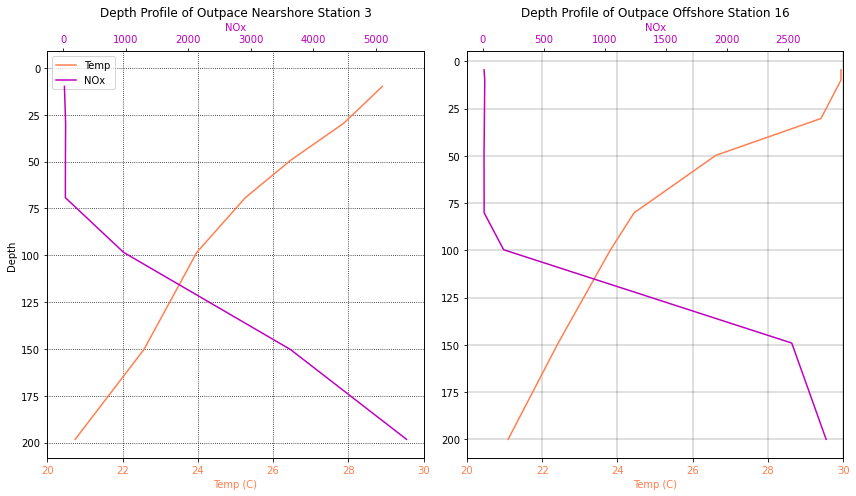

In [21]:
fig,ax = plt.subplots(figsize=(12,7), ncols=2)

cf0 = ax[0].plot(Station_3_Outpace_P.Temp, Station_3_Outpace_P.Pressure, color='coral', label='Temp (C)')

cf1 = ax[1].plot(Station_16_Outpace_P.Temp, Station_16_Outpace_P.Pressure, color='coral')

line1, = ax[0].plot([1, 2, 3], label='Temp', color='coral')
line2, = ax[0].plot([1, 2, 3], label='NOx', color='m')
ax[0].legend(handles=[line1, line2])

ax[0].set_xlim(20,30)
ax[0].set_xlabel('Temp (C)', color='coral')
ax[0].set_ylabel('Depth')
ax[0].set_title('Depth Profile of Outpace Nearshore Station 3')
ax[0].tick_params(axis='x', labelcolor='coral')
ax[0].grid(which='major',linestyle='dotted',color='k')
ax[0].invert_yaxis()
ax2 = ax[0].twiny()
ax2.set_xlabel('NOx', color='m')
ax2.plot(Station_3_Outpace_N.NOx, Station_3_Outpace_N.Pressure, color='m', label = 'NOx')
ax2.tick_params(axis='x', labelcolor='m')

ax[1].set_xlim(20,30)
ax[1].set_title('Depth Profile of Outpace Offshore Station 16')
ax[1].tick_params(axis='x', labelcolor='coral')
ax[1].set_xlabel('Temp (C)', color='coral')
ax[1].grid(which='major',color='k',linewidth=0.25)
ax[1].invert_yaxis()
ax3 = ax[1].twiny()
ax3.set_xlabel('NOx', color='m')
ax3.plot(Station_16_Outpace_N.NOx, Station_16_Outpace_N.Pressure, color='m', label = 'NOx')
ax3.tick_params(axis='x', labelcolor='m')

fig.tight_layout()

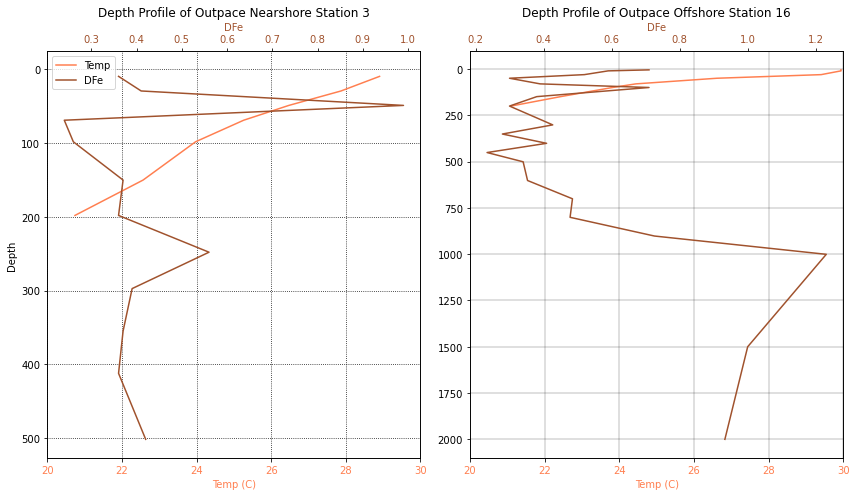

In [22]:
fig,ax = plt.subplots(figsize=(12,7), ncols=2)

cf0 = ax[0].plot(Station_3_Outpace_P.Temp, Station_3_Outpace_P.Pressure, color='coral', label='Temp (C)')

cf1 = ax[1].plot(Station_16_Outpace_P.Temp, Station_16_Outpace_P.Pressure, color='coral')

line1, = ax[0].plot([1, 2, 3], label='Temp', color='coral')
line2, = ax[0].plot([1, 2, 3], label='DFe', color='sienna')
ax[0].legend(handles=[line1, line2])

ax[0].set_xlim(20,30)
ax[0].set_xlabel('Temp (C)', color='coral')
ax[0].set_ylabel('Depth')
ax[0].set_title('Depth Profile of Outpace Nearshore Station 3')
ax[0].tick_params(axis='x', labelcolor='coral')
ax[0].grid(which='major',linestyle='dotted',color='k')
ax[0].invert_yaxis()
ax2 = ax[0].twiny()
ax2.set_xlabel('DFe', color='sienna')
ax2.plot(Station_3_Outpace_Fe.DFe, Station_3_Outpace_Fe.Pressure, color='sienna', label = 'Fe')
ax2.tick_params(axis='x', labelcolor='sienna')

ax[1].set_xlim(20,30)
ax[1].set_title('Depth Profile of Outpace Offshore Station 16')
ax[1].tick_params(axis='x', labelcolor='coral')
ax[1].set_xlabel('Temp (C)', color='coral')
ax[1].grid(which='major',color='k',linewidth=0.25)
ax[1].invert_yaxis()
ax3 = ax[1].twiny()
ax3.set_xlabel('DFe', color='sienna')
ax3.plot(Station_16_Outpace_Fe.DFe, Station_16_Outpace_Fe.Pressure, color='sienna', label = 'DFe')
ax3.tick_params(axis='x', labelcolor='sienna')

fig.tight_layout()

## How many samples did we sequence from each basin?
And how many from each cruise?

In [23]:
metadata['Ocean_Basin'] = metadata['Ocean'] + metadata['Basin']

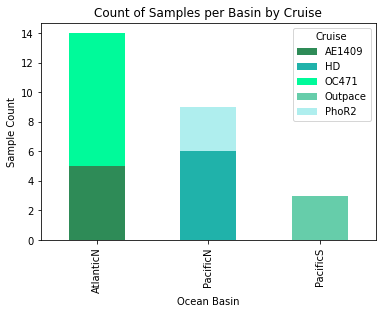

In [24]:
metadata.groupby(['Ocean_Basin','Cruise']).Ocean_Basin.count().unstack('Cruise').plot(kind='bar', ylabel='Sample Count', xlabel='Ocean Basin', title='Count of Samples per Basin by Cruise', stacked=True, color=['seagreen','lightseagreen','mediumspringgreen','mediumaquamarine','paleturquoise']);

# What type of data do we have for our samples?

## Histogram of Molecular Weights

In [25]:
#Clean data, split molecular weight column to conserve values
samples.rename(columns={samples.columns[1]:'Protein_Name'}, inplace=True)
samples.rename(columns={samples.columns[2]:'Accession_Number'}, inplace=True)
samples.rename(columns={samples.columns[3]:'Molecular_Weight'}, inplace=True)
samples[['Molecular_Weight', 'kDa']] = samples['Molecular_Weight'].str.split(' ', expand=True)

In [26]:
samples_MW = samples.Molecular_Weight.dropna()
samples_MW = samples_MW.astype(str).astype(int)

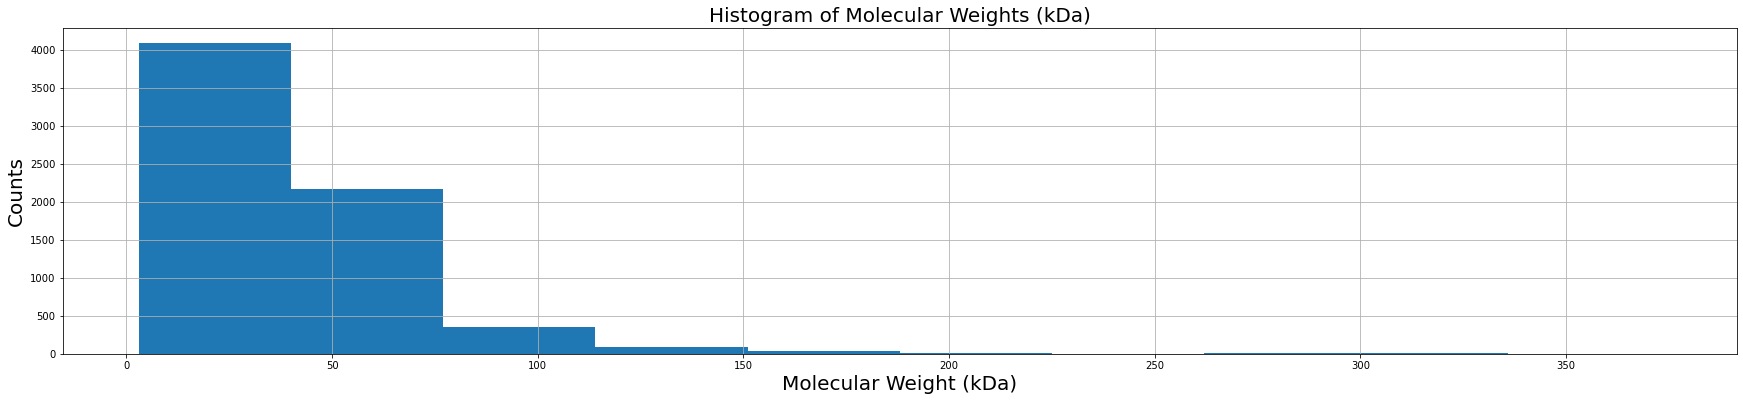

In [27]:
fig,ax=plt.subplots(figsize=(30,6))
ax.set_title('Histogram of Molecular Weights (kDa)', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.set_xlabel('Molecular Weight (kDa)', fontsize=20)
samples_MW.hist(bins=10);

## Using annots dataframe (protein annotations and protein IDs)

In [28]:
annots.rename(columns={annots.columns[1]:'Protein_Name'}, inplace=True)
annots.rename(columns={annots.columns[8]:'Molecular_Weight'}, inplace=True)
annots.Annot = annots.Annot.astype('string')
annots.Protein_Name = annots.Protein_Name.astype('string')
annots.Uniref_ID = annots.Uniref_ID.astype('string')
annots.Tery_ID = annots.Tery_ID.astype('string')

In [29]:
#subset of proteins that are IDed in the UniRef database as APs
annots_AP = annots[annots['Uniref_ID'].str.contains('phosphatase')]

In [30]:
Unique_Protein_ID = len(pd.unique(annots_AP['Uniref_ID']))
Unique_Protein_Names = len(pd.unique(annots_AP['Protein_Name']))
print(Unique_Protein_ID,',',Unique_Protein_Names)

4 , 14


We have 14 protein segments from the scaffolds listed that were found in our samples! These 14 segments correspond to just 4 different proteins. 

The Protein_Name column tells us which cruise and scaffold our sample protein segments matched to. The Uniref_ID column tells us which protein these segments are likely from.

## Let's see which basins had the most of each protein!

In [31]:
#Subsets of unique proteins
phoX = annots_AP[annots_AP['Uniref_ID'].str.contains('Pho')]
phoA = annots_AP[annots_AP['Uniref_ID'].str.contains('phoA')]
micro = annots_AP[annots_AP['Uniref_ID'].str.contains('Micro')]
tere = annots_AP[annots_AP['Uniref_ID'].str.contains('Tere')]

In [32]:
Basins = ['N Atlantic','N Pacific','S Pacific']
phoX_sums = [phoX.Atlantic_N_count.sum(), phoX.Pacific_N_count.sum(), phoX.Pacific_S_count.sum()]
phoX_sums_norm = [phoX.Atlantic_N_count_norm.sum(), phoX.Pacific_N_count_norm.sum(), phoX.Pacific_S_count_norm.sum()]
phoA_sums = [phoA.Atlantic_N_count.sum(), phoA.Pacific_N_count.sum(), phoA.Pacific_S_count.sum()]
phoA_sums_norm = [phoA.Atlantic_N_count_norm.sum(), phoA.Pacific_N_count_norm.sum(), phoA.Pacific_S_count_norm.sum()]
micro_sums = [micro.Atlantic_N_count.sum(), micro.Pacific_N_count.sum(), micro.Pacific_S_count.sum()]
micro_sums_norm = [micro.Atlantic_N_count_norm.sum(), micro.Pacific_N_count_norm.sum(), micro.Pacific_S_count_norm.sum()]
tere_sums = [tere.Atlantic_N_count.sum(), tere.Pacific_N_count.sum(), tere.Pacific_S_count.sum()]
tere_sums_norm = [tere.Atlantic_N_count_norm.sum(), tere.Pacific_N_count_norm.sum(), tere.Pacific_S_count_norm.sum()]

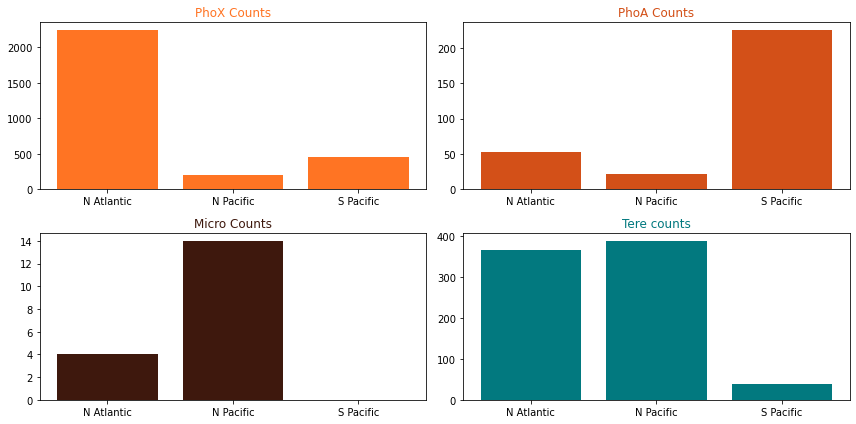

In [33]:
fig, axs = plt.subplots(figsize=(12,6), ncols=2, nrows=2)
axs[0, 0].bar(Basins, phoX_sums, color='#ff7423')
axs[0, 0].set_title('PhoX Counts', color='#ff7423')
axs[0, 1].bar(Basins, phoA_sums, color='#d35018')
axs[0, 1].set_title('PhoA Counts', color='#d35018')
axs[1, 0].bar(Basins, micro_sums, color='#3e180d')
axs[1, 0].set_title('Micro Counts', color='#3e180d')
axs[1, 1].bar(Basins, tere_sums, color='#02797f')
axs[1, 1].set_title('Tere counts', color='#02797f')

fig.tight_layout();

PhoX in the N Atlantic is by far the most prevalent by number. But there is significant sampling bias here, over half of our samples were from the N Atlantic. Let's account for that:

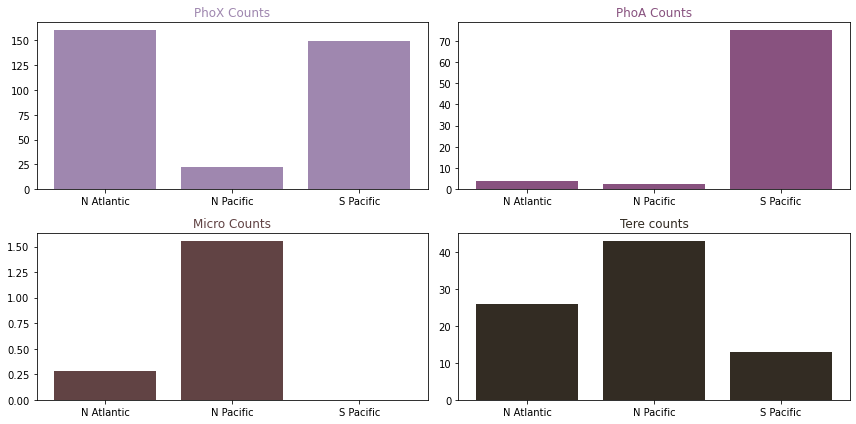

In [38]:
fig, axs = plt.subplots(figsize=(12,6), ncols=2, nrows=2)
axs[0, 0].bar(Basins, phoX_sums_norm, color='#9f87af')
axs[0, 0].set_title('PhoX Counts', color='#9f87af')
axs[0, 1].bar(Basins, phoA_sums_norm, color='#88527f')
axs[0, 1].set_title('PhoA Counts', color='#88527f')
axs[1, 0].bar(Basins, micro_sums_norm, color='#614344')
axs[1, 0].set_title('Micro Counts', color='#614344')
axs[1, 1].bar(Basins, tere_sums_norm, color='#332c23')
axs[1, 1].set_title('Tere counts', color='#332c23')

fig.tight_layout();

Now we know there were similar amounts of PhoX in the N Atlantic as in the N Pacific by sample. And there's far more PhoA in the S Pacific than anywhere else.

Maybe we can look at the Pabst samples that were unusual earlier.

In [35]:
phoX.rename(columns={annots.columns[16]:'X1_AE1409_Atlantic_N_St2'}, inplace=True)
phoX.rename(columns={annots.columns[17]:'X1_AE1409_Atlantic_N_St10'}, inplace=True)
phoX.rename(columns={annots.columns[18]:'X1_AE1409_Atlantic_N_St16'}, inplace=True)
phoX_2 = [phoX.X1_AE1409_Atlantic_N_St2.sum(), phoX.X4_AE1409_Atlantic_N_St9.sum(), phoX.X1_AE1409_Atlantic_N_St10.sum(),  phoX.X1_AE1409_Atlantic_N_St16.sum(),  phoX.X5_AE1409_Atlantic_N_St17.sum()]
Stations = ['2','9','10','16','17']

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [36]:
Pabst_subset = Surface_Pabst.loc[Surface_Pabst['Station'].isin([2,9,10,16,17])]
Pabst_subset['PhoX'] = phoX_2

/tmp/ipykernel_386/1025569051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pabst_subset['PhoX'] = phoX_2


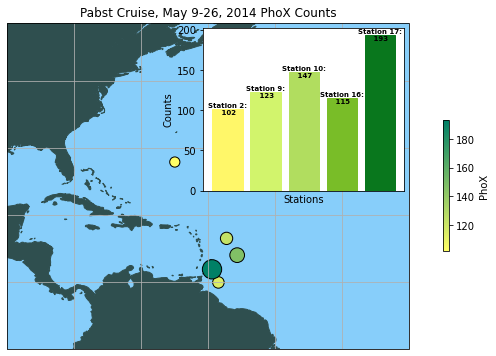

In [37]:
extent = [-90, -30, 0, 45]
mag = (Pabst_subset.PhoX)**2/100
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightskyblue');
ax.add_feature(cartopy.feature.LAND, facecolor='darkslategrey');
ax.set_global()
ax.gridlines()
ax.set_extent(extent)
ax.set_title('Pabst Cruise, May 9-26, 2014 PhoX Counts')
plot = Pabst_subset.plot(ax=ax, transform=ccrs.PlateCarree(), kind='scatter', c='PhoX', x='Lon', y='Lat', s=mag, cmap='summer_r', edgecolor='k', colorbar=False)
plot = ax.collections[0]
fig.colorbar(plot, shrink=0.4, label='PhoX');

#ax.annotate('Station 2', xy=(27.87176,-64.989712), ha='right');
axins = inset_axes(ax, width="50%", height="50%", loc="upper right",)

#fig, axins = plt.subplots(figsize=(12,6))
bar = axins.bar(Stations, phoX_2, color='palevioletred')
#axins.set_title('Pabst PhoX Counts', color='#8e8beb', fontsize=20)
axins.set_xlabel('Stations', color='k',fontsize=10)
axins.set_ylabel('Counts', color='k',fontsize=10)
axins.xaxis.set_ticks([])
bar[0].set_color('#fff769')
bar[1].set_color('#d2f46c')
bar[2].set_color('#b1dd5f')
bar[3].set_color('#79bd28')
bar[4].set_color('#09771d');

for xy in zip(Stations, phoX_2):
    axins.annotate('Station %s:\n %s' % xy, xy=xy, textcoords='data', color='k', fontweight='bold', ha='center', va='center', fontsize=7)